<a href="https://colab.research.google.com/github/shahdwd/Credit_Scoring_Model/blob/main/Credit_Scoring_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
from google.colab import files
uploaded = files.upload()

Saving creditdata.csv to creditdata (1).csv


In [87]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from pandas.api.types import is_string_dtype
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.utils.multiclass import unique_labels


In [88]:
# use pandas to load the csv file
data = pd.read_csv('creditdata.csv')
data2 = pd.read_csv("creditdata.csv")



In [89]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [90]:
data.shape

(5960, 13)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [92]:
data.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [93]:
data.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

0    4771
1    1189
Name: BAD, dtype: int64


<Axes: >

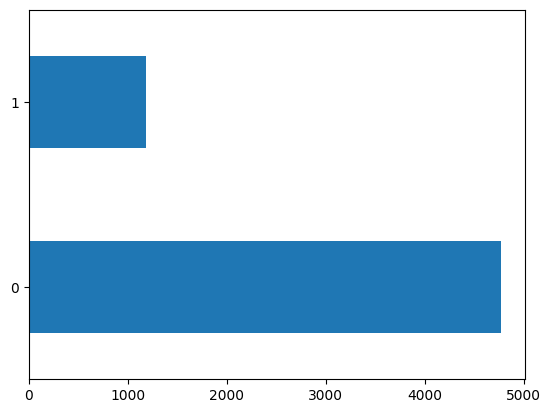

In [94]:
print(data["BAD"].value_counts())
data["BAD"].value_counts().plot(kind='barh')

In [95]:
print(data["REASON"].value_counts())

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64


In [96]:
print(data["JOB"].value_counts())

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64


<Axes: ylabel='Frequency'>

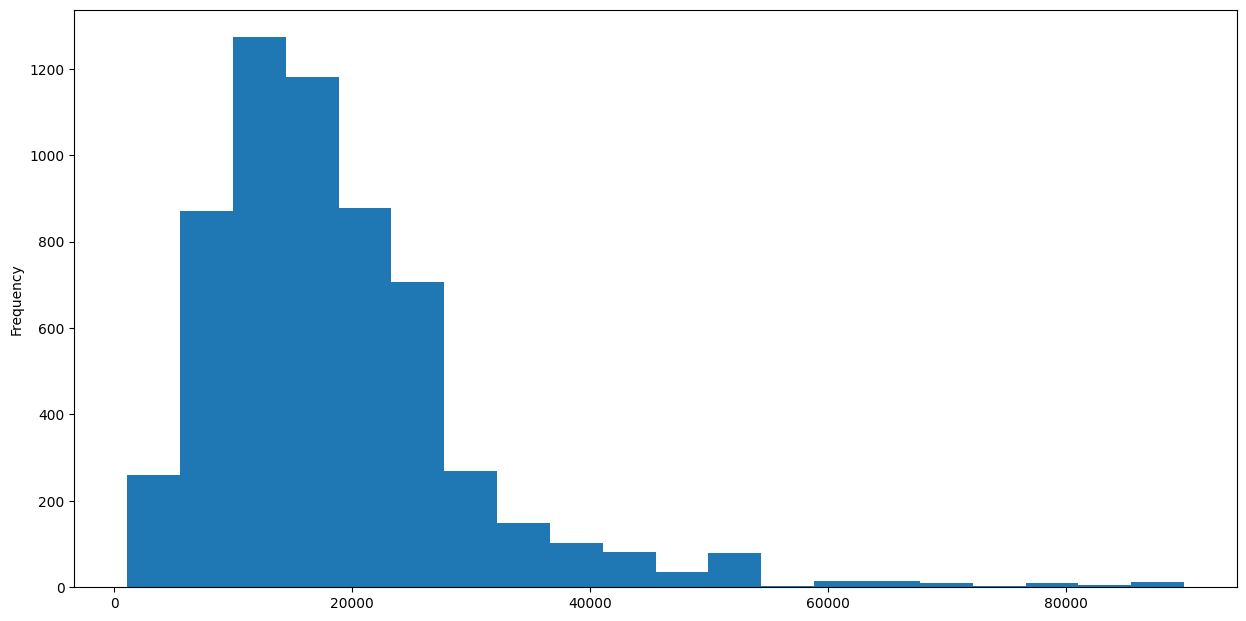

In [97]:
data["LOAN"].plot.hist(bins = 20,figsize=(15,7.5))

<Axes: ylabel='Frequency'>

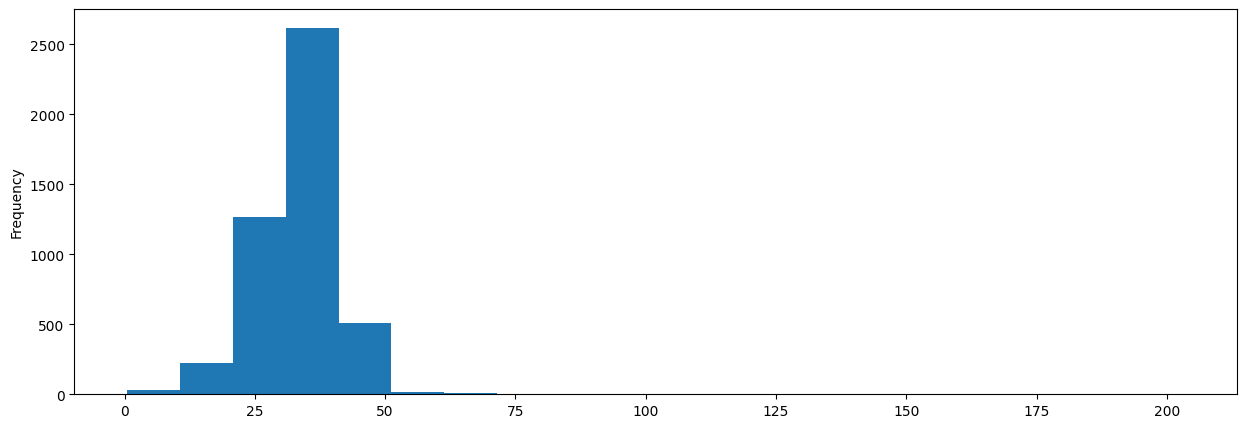

In [98]:
data["DEBTINC"].plot.hist(bins = 20,figsize=(15,5))

<Axes: ylabel='Frequency'>

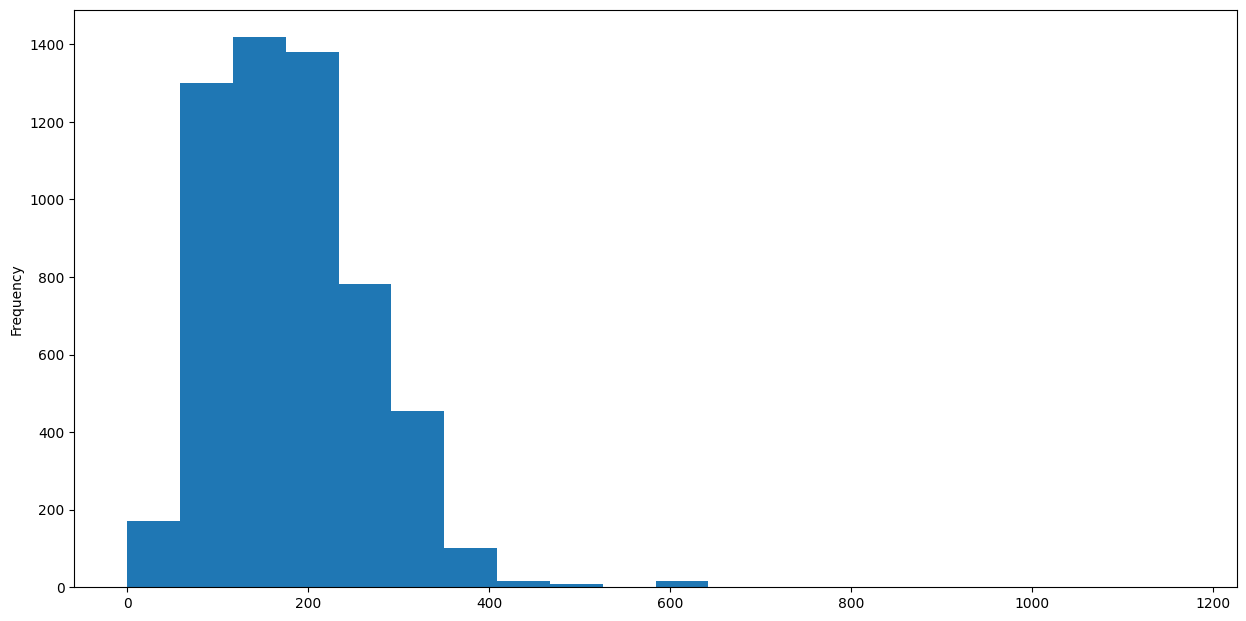

In [99]:
data["CLAGE"].plot.hist(bins = 20,figsize=(15,7.5))

<Axes: ylabel='Frequency'>

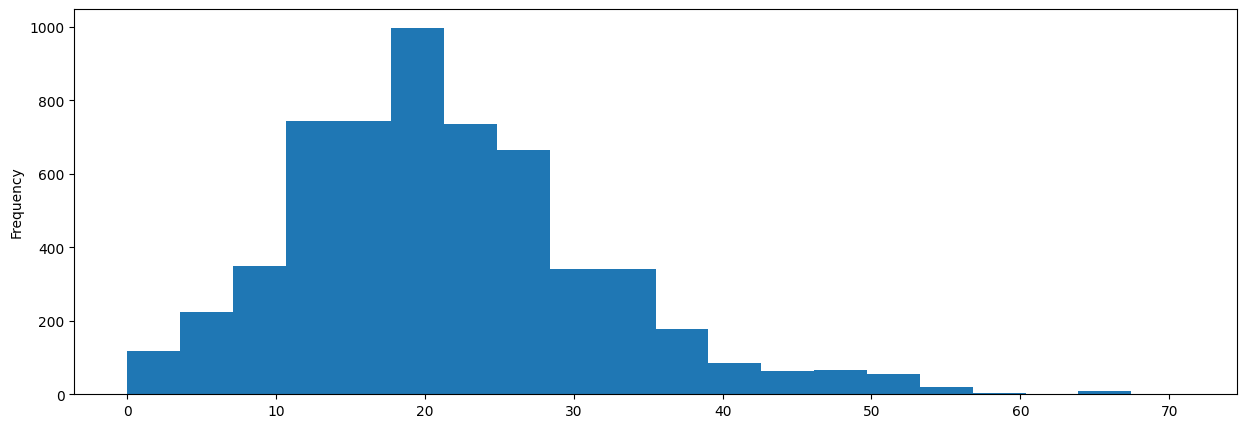

In [100]:
data["CLNO"].plot.hist(bins = 20,figsize=(15,5))


<Axes: ylabel='Frequency'>

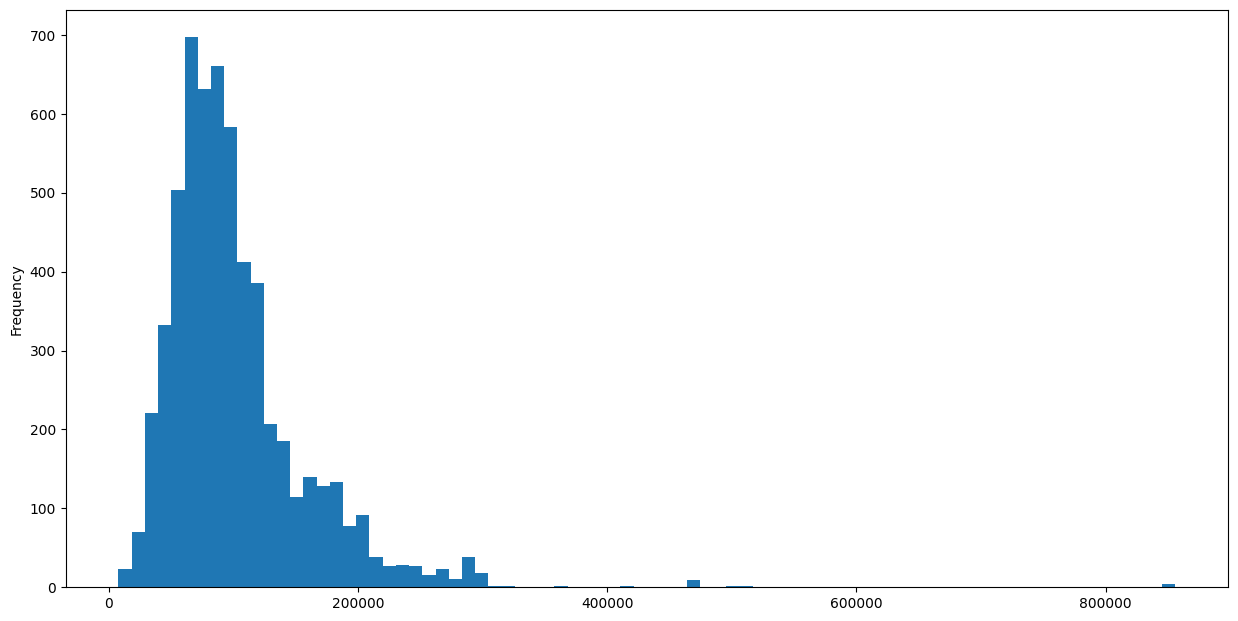

In [101]:
data["VALUE"].plot.hist(bins = 80,figsize=(15,7.5))

<Axes: ylabel='Frequency'>

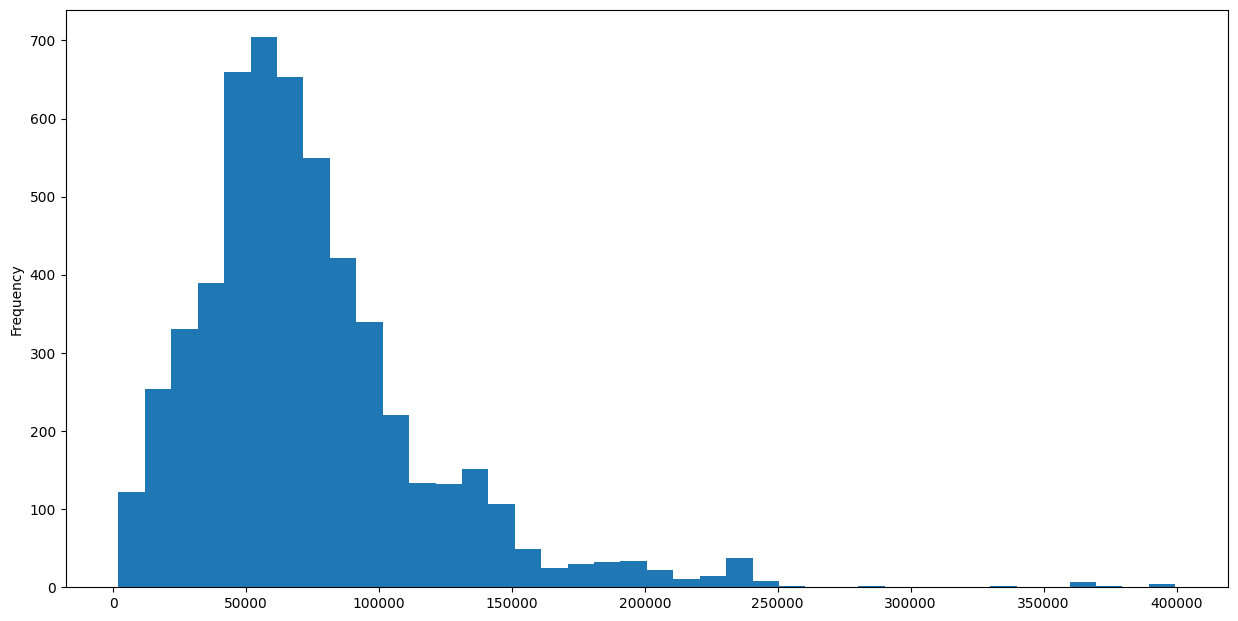

In [102]:
data["MORTDUE"].plot.hist(bins = 40,figsize=(15,7.5))

<Axes: ylabel='Frequency'>

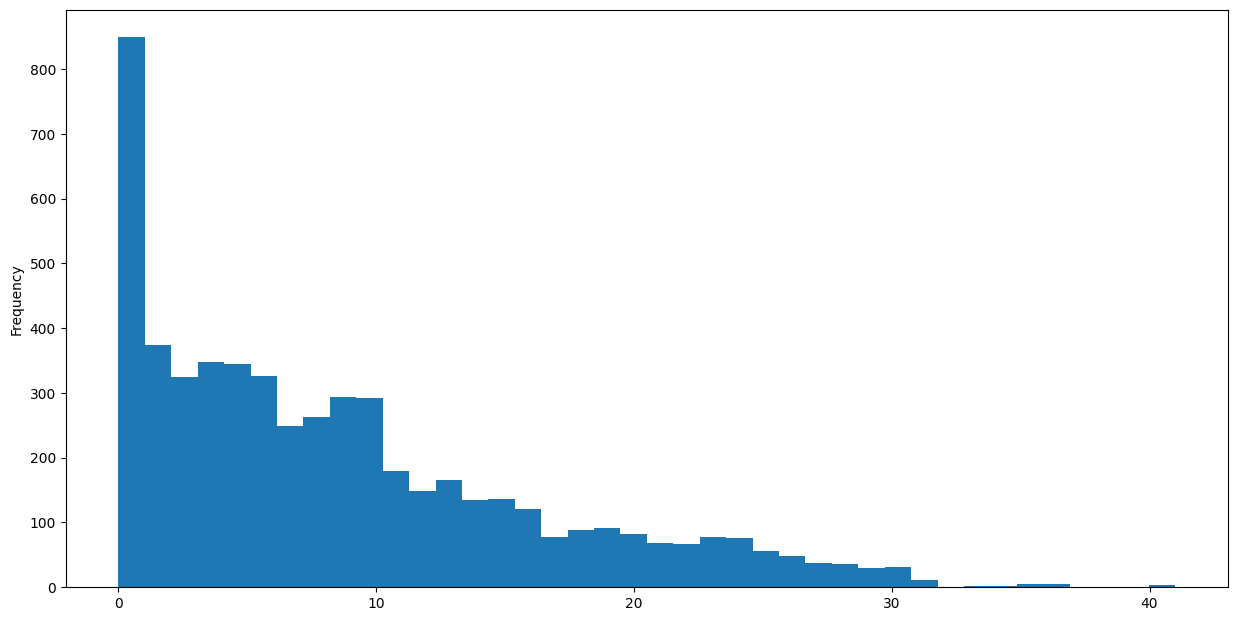

In [103]:
data["YOJ"].plot.hist(bins = 40,figsize=(15,7.5))

In [104]:
data["DEROG"].value_counts()


0.0     4527
1.0      435
2.0      160
3.0       58
4.0       23
5.0       15
6.0       15
7.0        8
8.0        6
9.0        3
10.0       2
Name: DEROG, dtype: int64

In [105]:
data["DELINQ"].value_counts()

0.0     4179
1.0      654
2.0      250
3.0      129
4.0       78
5.0       38
6.0       27
7.0       13
8.0        5
10.0       2
11.0       2
15.0       1
12.0       1
13.0       1
Name: DELINQ, dtype: int64

In [106]:
data["NINQ"].value_counts()

0.0     2531
1.0     1339
2.0      780
3.0      392
4.0      156
5.0       75
6.0       56
7.0       44
10.0      28
8.0       22
9.0       11
11.0      10
12.0       2
13.0       2
14.0       1
17.0       1
Name: NINQ, dtype: int64

In [107]:
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [108]:
data["REASON"].fillna(value = "DebtCon",inplace = True)
data["JOB"].fillna(value = "Other",inplace = True)

In [109]:
data["DEROG"].fillna(value=0,inplace=True)
data["DELINQ"].fillna(value=0,inplace=True)

In [110]:
data.fillna(value=data.mean(),inplace=True)

<ipython-input-110-c714aa09b2c6>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(value=data.mean(),inplace=True)


In [111]:
data.isnull().sum()


BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [112]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.0,0.0,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.0,2.0,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.0,0.0,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,DebtCon,Other,8.922268,0.0,0.0,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.0,0.0,93.333333,0.000000,14.000000,33.779915


In [118]:
# importing the required modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# removing the features BAD,JOB,REASON from the input features set
x_basic = data.drop(columns=["BAD","JOB","REASON"])
y = data["BAD"]

# Spliting the data into test and train sets
x_basic_tr,x_basic_te,y_tr,y_te = train_test_split(x_basic,y,test_size =.33,random_state=1)
logreg_basic = LogisticRegression()

# Training the basic logistic regression model with training set
logreg_basic.fit(x_basic_tr,y_tr)

# Printing the coefficients
print("intercept ")
print(logreg_basic.intercept_)
print("")
print("coefficients ")
print(logreg_basic.coef_)

# Predicting the output of the test cases using the algorithm created above
y_pre = logreg_basic.predict(x_basic_te)

# Validating the algorithm using various Performance metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("")
a1 = accuracy_score(y_te,y_pre)
f1 = f1_score(y_te, y_pre, average="macro")
p1 = precision_score(y_te, y_pre, average="macro")
r1 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)


intercept 
[-1.6e-05]

coefficients 
[[-1.75e-05 -4.04e-06  2.42e-06 -2.45e-04  6.35e-05  9.46e-05 -6.12e-03
   7.00e-05 -2.10e-04 -1.50e-04]]

accuracy score :  0.7935943060498221
f1 score :  0.44246031746031744
precision score :  0.39679715302491103
recall score :  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1561    0]
 [ 406    0]]


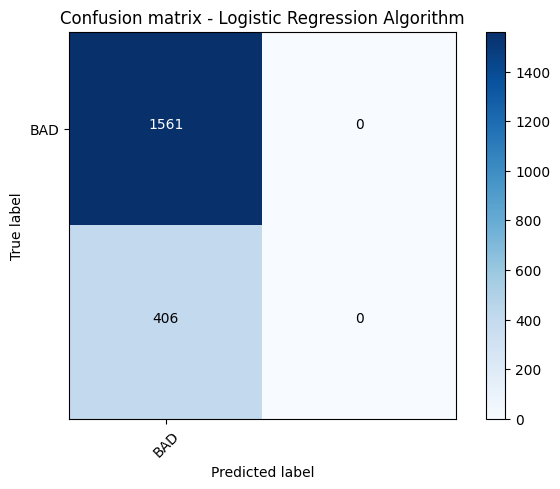

In [120]:
# Computing Confusion matrix for the above algorithm
import itertools
cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],title='Confusion matrix - Logistic Regression Algorithm')

plt.show()

accuracy score :  0.8647686832740213
f1 score :  0.7852373290426388
precision score :  0.7981189116560296
recall score :  0.7744703881243236
Confusion matrix, without normalization
[[1449  112]
 [ 154  252]]


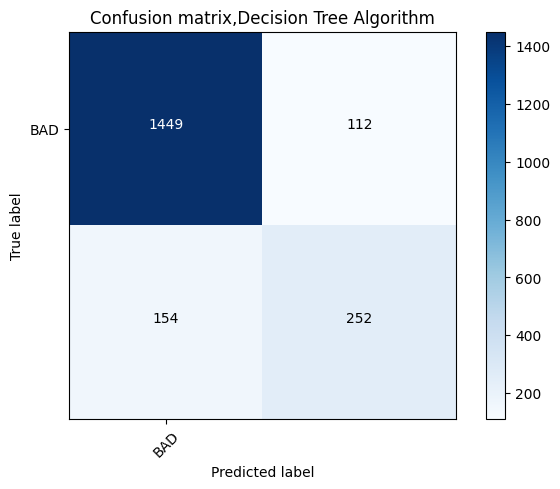

In [121]:
# importing the required modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

dectree_basic = DecisionTreeClassifier()
dectree_basic.max_depth = 100
# Training the basic Decision Tree model with training set
dectree_basic.fit(x_basic_tr,y_tr)

# Predicting the output of the test cases using the algorithm created above
y_pre = dectree_basic.predict(x_basic_te)

# Validating the algorithm using various Performance metrics

a2 = accuracy_score(y_te,y_pre)
f2 = f1_score(y_te, y_pre, average="macro")
p2 = precision_score(y_te, y_pre, average="macro")
r2 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a2)
print("f1 score : ",f2)
print("precision score : ",p2)
print("recall score : ",r2)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
                      title='Confusion matrix,Decision Tree Algorithm')

plt.show()

In [122]:
# Capping off the features CLAGE(values >= 600 to 600) , VALUE(values>=400000 to 400000) , MORTDUE(values>=300000 to 300000) and DEBTINC(values >=100 to 100)

data.loc[data["CLAGE"]>=600,"CLAGE"] = 600
data.loc[data["VALUE"]>=400000,"VALUE"] = 400000
data.loc[data["MORTDUE"]>=300000,"MORTDUE"] = 300000
data.loc[data["DEBTINC"]>=100,"DEBTINC"] = 100

In [123]:
data["B_DEROG"] = (data["DEROG"]>=1)*1
data["B_DELINQ"] = (data["DELINQ"]>=1)*1

In [124]:
data["JOB"].unique()


array(['Other', 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'], dtype=object)

In [125]:
data["REASON_1"] = (data["REASON"] == "HomeImp") * 1
data["REASON_2"] = (data["REASON"] != "HomeImp") * 1
data["JOB_1"] = (data["JOB"] == "Other") * 1
data["JOB_2"] = (data["JOB"] == "Office") * 1
data["JOB_3"] = (data["JOB"] == "Sales") * 1
data["JOB_4"] = (data["JOB"] == "Mgr") * 1
data["JOB_5"] = (data["JOB"] == "ProfExe") * 1
data["JOB_6"] = (data["JOB"] == "Self") * 1
data.drop(["JOB", "REASON"], axis=1, inplace=True)


# The above assignment creates new features for each JOB and each REASON

In [126]:
print(data.columns)


Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC', 'B_DEROG', 'B_DELINQ', 'REASON_1',
       'REASON_2', 'JOB_1', 'JOB_2', 'JOB_3', 'JOB_4', 'JOB_5', 'JOB_6'],
      dtype='object')


In [127]:
data["YOJ"] = data["YOJ"].apply(lambda t : np.log(t+1))

In [128]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,B_DEROG,B_DELINQ,REASON_1,REASON_2,JOB_1,JOB_2,JOB_3,JOB_4,JOB_5,JOB_6
0,1,1100,25860.0000,39025.000000,2.442347,0.0,0.0,94.366667,1.000000,9.000000,...,0,0,1,0,1,0,0,0,0,0
1,1,1300,70053.0000,68400.000000,2.079442,0.0,2.0,121.833333,0.000000,14.000000,...,0,1,1,0,1,0,0,0,0,0
2,1,1500,13500.0000,16700.000000,1.609438,0.0,0.0,149.466667,1.000000,10.000000,...,0,0,1,0,1,0,0,0,0,0
3,1,1500,73760.8172,101776.048741,2.294782,0.0,0.0,179.766275,1.186055,21.296096,...,0,0,0,1,1,0,0,0,0,0
4,0,1700,97800.0000,112000.000000,1.386294,0.0,0.0,93.333333,0.000000,14.000000,...,0,0,1,0,0,1,0,0,0,0


In [129]:
data.corr(method='pearson')

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,B_DEROG,B_DELINQ,REASON_1,REASON_2,JOB_1,JOB_2,JOB_3,JOB_4,JOB_5,JOB_6
BAD,1.000000,-0.075099,-0.049420,-0.043711,-0.053066,0.269921,0.346503,-0.173412,0.168851,-0.004067,...,0.261216,0.308153,0.037517,-0.037517,0.037949,-0.073613,0.050934,0.032583,-0.043561,0.046245
LOAN,-0.075099,1.000000,0.214803,0.338749,0.102458,0.006996,-0.028869,0.088875,0.043160,0.071804,...,0.009079,-0.030646,-0.151477,0.151477,-0.058067,-0.018060,-0.044993,0.018769,0.017488,0.158452
MORTDUE,-0.049420,0.214803,1.000000,0.816001,-0.052771,-0.046526,0.002095,0.132928,0.026853,0.314779,...,-0.041471,-0.014568,-0.026941,0.026941,-0.259602,-0.066813,0.026023,0.076687,0.256575,0.107944
VALUE,-0.043711,0.338749,0.816001,1.000000,0.023878,-0.041263,-0.000578,0.178638,-0.004635,0.283654,...,-0.040482,-0.034988,-0.012308,0.012308,-0.288132,-0.058463,0.018250,0.051960,0.282653,0.163060
YOJ,-0.053066,0.102458,-0.052771,0.023878,1.000000,-0.050552,0.023185,0.145111,-0.052621,0.042928,...,-0.058295,0.023075,0.060306,-0.060306,0.023324,-0.066539,-0.041243,0.029926,0.024664,-0.010586
DEROG,0.269921,0.006996,-0.046526,-0.041263,-0.050552,1.000000,0.171286,-0.081231,0.146700,0.050727,...,0.755021,0.171622,-0.008406,0.008406,0.034537,-0.049223,0.030659,0.031342,-0.033939,0.000836
DELINQ,0.346503,-0.028869,0.002095,-0.000578,0.023185,0.171286,1.000000,0.026713,0.057212,0.159378,...,0.188767,0.748356,0.004024,-0.004024,-0.044718,0.005268,-0.016502,0.059350,-0.002911,0.021694
CLAGE,-0.173412,0.088875,0.132928,0.178638,0.145111,-0.081231,0.026713,1.000000,-0.110857,0.242213,...,-0.083332,0.007707,0.050670,-0.050670,-0.080490,0.000032,0.026502,-0.022948,0.112309,-0.010872
NINQ,0.168851,0.043160,0.026853,-0.004635,-0.052621,0.146700,0.057212,-0.110857,1.000000,0.085148,...,0.152237,0.059767,-0.115992,0.115992,0.054470,-0.063735,-0.035677,0.069826,-0.061553,0.016229
CLNO,-0.004067,0.071804,0.314779,0.283654,0.042928,0.050727,0.159378,0.242213,0.085148,1.000000,...,0.035880,0.154674,-0.107224,0.107224,-0.197815,-0.004549,0.049185,0.060210,0.165109,0.031325


In [130]:
feat1=["DEROG","DELINQ","CLAGE","NINQ","DEBTINC","YOJ","LOAN"]

accuracy score :  0.824097610574479
f1 score :  0.6408659549228944
precision score :  0.763878859958374
recall score :  0.6176301663389958
Confusion matrix, without normalization
[[1513   48]
 [ 298  108]]


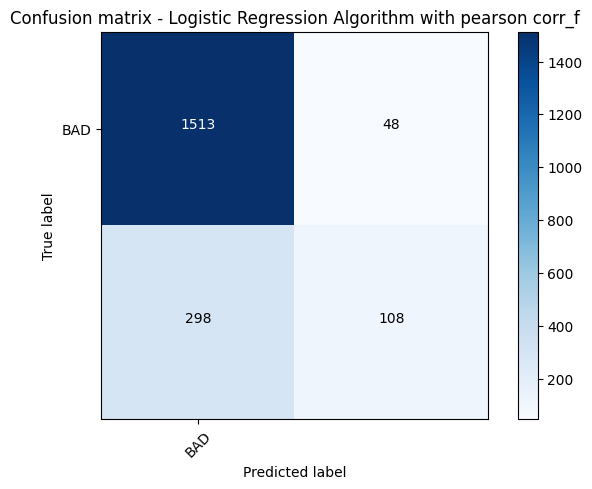

In [131]:

x = data[feat1]
y = data["BAD"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.33,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_tr,y_tr)
y_pre = logreg.predict(x_te)
a3 = accuracy_score(y_te,y_pre)
f3 = f1_score(y_te, y_pre, average="macro")
p3 = precision_score(y_te, y_pre, average="macro")
r3 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a3)
print("f1 score : ",f3)
print("precision score : ",p3)
print("recall score : ",r3)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
title='Confusion matrix - Logistic Regression Algorithm with pearson corr_f')

plt.show()

accuracy score :  0.8546009150991357
f1 score :  0.7739320319683145
precision score :  0.7793331104796924
recall score :  0.7689754578188164

Confusion matrix, without normalization
[[1428  133]
 [ 153  253]]


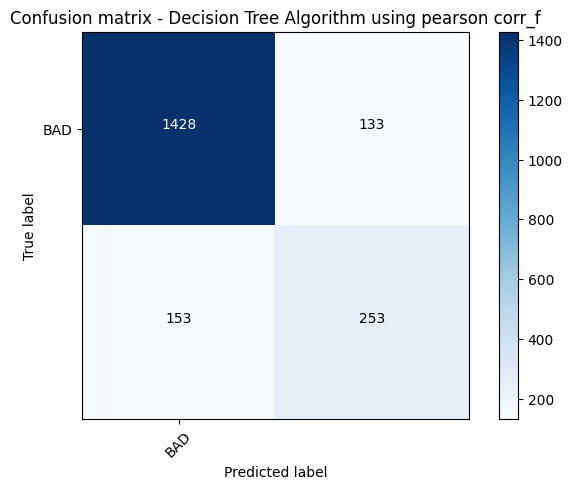

In [132]:
# Decision Tree classifier using feat1

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a4 = accuracy_score(y_te,y_pre)
f4 = f1_score(y_te, y_pre, average="macro")
p4 = precision_score(y_te, y_pre, average="macro")
r4 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a4)
print("f1 score : ",f4)
print("precision score : ",p4)
print("recall score : ",r4)
print("")
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
title='Confusion matrix - Decision Tree Algorithm using pearson corr_f')

plt.show()

In [133]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
df_new = pd.DataFrame(SelectKBest(chi2, k=10).fit_transform(data.drop(["BAD"],axis = 1),data["BAD"]))

In [134]:
df_new.head()


,0,1,2,3,4,5,6,7,8,9
0,1100.0,25860.0000,39025.000000,0.0,0.0,94.366667,1.000000,33.779915,0.0,0.0
1,1300.0,70053.0000,68400.000000,0.0,2.0,121.833333,0.000000,33.779915,0.0,1.0
2,1500.0,13500.0000,16700.000000,0.0,0.0,149.466667,1.000000,33.779915,0.0,0.0
3,1500.0,73760.8172,101776.048741,0.0,0.0,179.766275,1.186055,33.779915,0.0,0.0
4,1700.0,97800.0000,112000.000000,0.0,0.0,93.333333,0.000000,33.779915,0.0,0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy score :  0.7935943060498221
f1 score :  0.44246031746031744
precision score :  0.39679715302491103
recall score :  0.5
Confusion matrix, without normalization
[[1561    0]
 [ 406    0]]


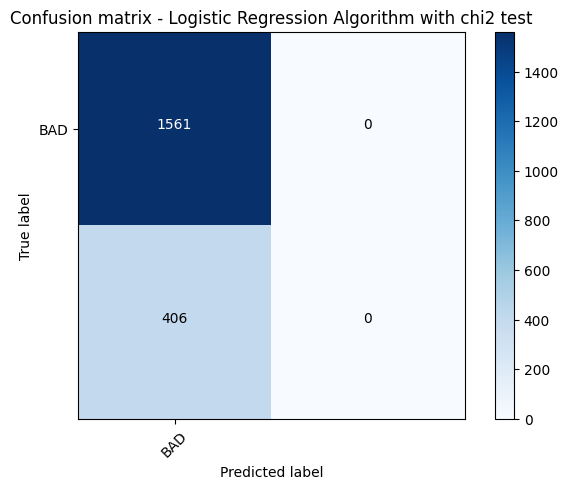

In [135]:
x = df_new
y = data["BAD"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = .33,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_tr,y_tr)
y_pre = logreg.predict(x_te)
y_pre = logreg.predict(x_te)
a5 = accuracy_score(y_te,y_pre)
f5 = f1_score(y_te, y_pre, average="macro")
p5 = precision_score(y_te, y_pre, average="macro")
r5 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a5)
print("f1 score : ",f5)
print("precision score : ",p5)
print("recall score : ",r5)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
 title='Confusion matrix - Logistic Regression Algorithm with chi2 test')

plt.show()

accuracy score :  0.8652770716827657
f1 score :  0.7911224381437825
precision score :  0.7959401604973266
recall score :  0.7866365503987276
Confusion matrix, without normalization
[[1437  124]
 [ 141  265]]


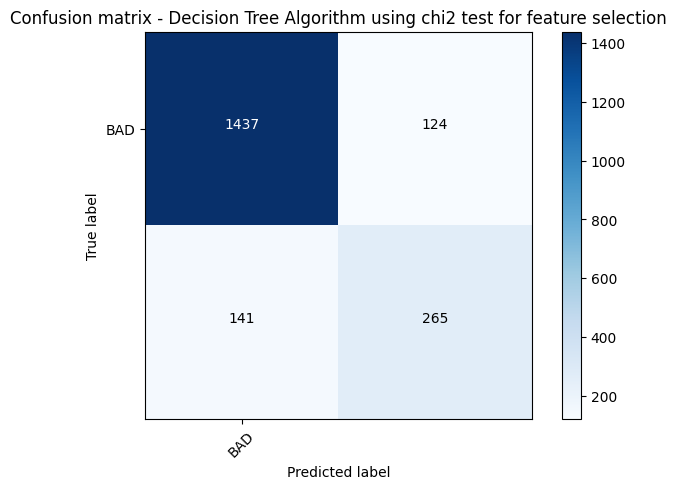

In [136]:
clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a6 = accuracy_score(y_te,y_pre)
f6 = f1_score(y_te, y_pre, average="macro")
p6 = precision_score(y_te, y_pre, average="macro")
r6 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a6)
print("f1 score : ",f6)
print("precision score : ",p6)
print("recall score : ",r6)
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
title='Confusion matrix - Decision Tree Algorithm using chi2 test for feature selection')

plt.show()

In [137]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,B_DEROG,B_DELINQ,REASON_1,REASON_2,JOB_1,JOB_2,JOB_3,JOB_4,JOB_5,JOB_6
0,1,1100,25860.0000,39025.000000,2.442347,0.0,0.0,94.366667,1.000000,9.000000,...,0,0,1,0,1,0,0,0,0,0
1,1,1300,70053.0000,68400.000000,2.079442,0.0,2.0,121.833333,0.000000,14.000000,...,0,1,1,0,1,0,0,0,0,0
2,1,1500,13500.0000,16700.000000,1.609438,0.0,0.0,149.466667,1.000000,10.000000,...,0,0,1,0,1,0,0,0,0,0
3,1,1500,73760.8172,101776.048741,2.294782,0.0,0.0,179.766275,1.186055,21.296096,...,0,0,0,1,1,0,0,0,0,0
4,0,1700,97800.0000,112000.000000,1.386294,0.0,0.0,93.333333,0.000000,14.000000,...,0,0,1,0,0,1,0,0,0,0


In [138]:
from sklearn.feature_selection import f_classif

df_new2 = pd.DataFrame(SelectKBest(f_classif, k=10).fit_transform(data.drop(["BAD"],axis=1),data["BAD"]))
df_new2.head()

,0,1,2,3,4,5,6,7,8,9
0,1100.0,2.442347,0.0,0.0,94.366667,1.000000,33.779915,0.0,0.0,0.0
1,1300.0,2.079442,0.0,2.0,121.833333,0.000000,33.779915,0.0,1.0,0.0
2,1500.0,1.609438,0.0,0.0,149.466667,1.000000,33.779915,0.0,0.0,0.0
3,1500.0,2.294782,0.0,0.0,179.766275,1.186055,33.779915,0.0,0.0,0.0
4,1700.0,1.386294,0.0,0.0,93.333333,0.000000,33.779915,0.0,0.0,1.0


accuracy score :  0.8256227758007118
f1 score :  0.6496716000650101
precision score :  0.7634780439121757
recall score :  0.6249696260133867
Confusion matrix, without normalization
[[1509   52]
 [ 291  115]]


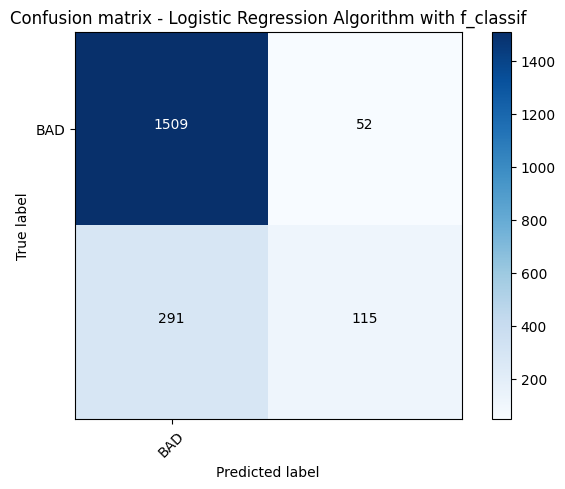

In [139]:
x = df_new2
y = data["BAD"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = .33,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_tr,y_tr)
y_pre = logreg.predict(x_te)
a7 = accuracy_score(y_te,y_pre)
f7 = f1_score(y_te, y_pre, average="macro")
p7 = precision_score(y_te, y_pre, average="macro")
r7 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a7)
print("f1 score : ",f7)
print("precision score : ",p7)
print("recall score : ",r7)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
title='Confusion matrix - Logistic Regression Algorithm with f_classif')

plt.show()

accuracy score :  0.8607015760040672
f1 score :  0.7838253461470583
precision score :  0.7888197541181616
recall score :  0.7791976849499658
Confusion matrix, without normalization
[[1433  128]
 [ 146  260]]


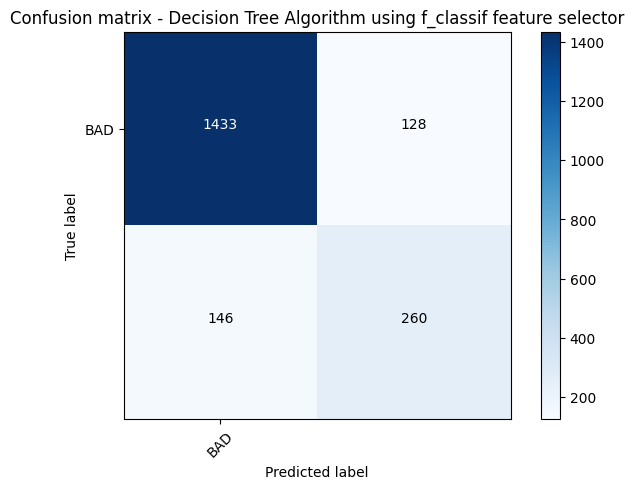

In [141]:

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a8 = accuracy_score(y_te,y_pre)
f8 = f1_score(y_te, y_pre, average="macro")
p8 = precision_score(y_te, y_pre, average="macro")
r8 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a8)
print("f1 score : ",f8)
print("precision score : ",p8)
print("recall score : ",r8)
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
                      title='Confusion matrix - Decision Tree Algorithm using f_classif feature selector')

plt.show()

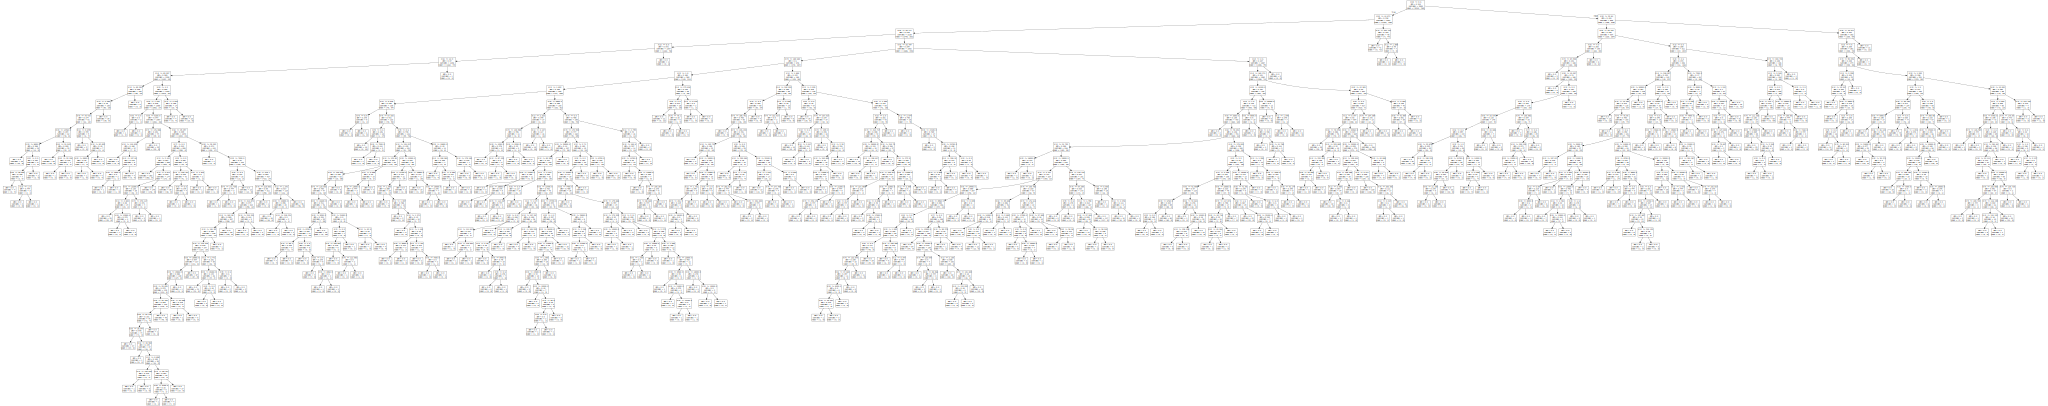

In [142]:
from sklearn import tree
import graphviz
dot_dat = tree.export_graphviz(clf_tree, out_file=None)
graph = graphviz.Source(dot_dat)
graph

In [143]:
from sklearn.feature_selection import f_regression

df_new3 = pd.DataFrame(SelectKBest(f_regression, k=10).fit_transform(data.drop(["BAD"],axis=1),data["BAD"]))
df_new3.head()

,0,1,2,3,4,5,6,7,8,9
0,1100.0,2.442347,0.0,0.0,94.366667,1.000000,33.779915,0.0,0.0,0.0
1,1300.0,2.079442,0.0,2.0,121.833333,0.000000,33.779915,0.0,1.0,0.0
2,1500.0,1.609438,0.0,0.0,149.466667,1.000000,33.779915,0.0,0.0,0.0
3,1500.0,2.294782,0.0,0.0,179.766275,1.186055,33.779915,0.0,0.0,0.0
4,1700.0,1.386294,0.0,0.0,93.333333,0.000000,33.779915,0.0,0.0,1.0


accuracy score :  0.8256227758007118
f1 score :  0.6496716000650101
precision score :  0.7634780439121757
recall score :  0.6249696260133867
Confusion matrix, without normalization
[[1433  128]
 [ 146  260]]


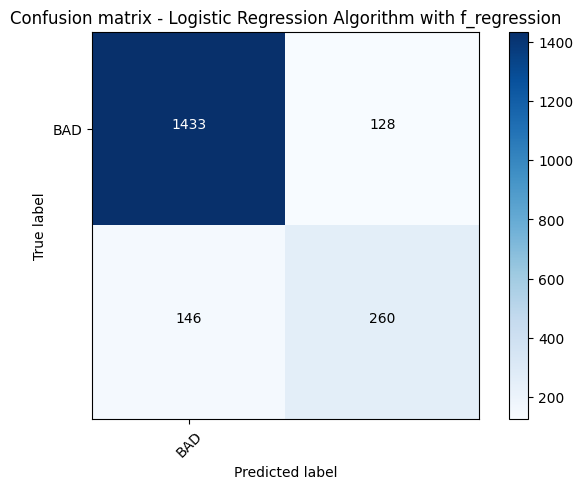

In [144]:
x = df_new3
y = data["BAD"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = .33,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_tr,y_tr)
y_pre2 = logreg.predict(x_te)
a9 = accuracy_score(y_te,y_pre2)
f9 = f1_score(y_te, y_pre2, average="macro")
p9 = precision_score(y_te, y_pre2, average="macro")
r9 = recall_score(y_te, y_pre2, average="macro")
print("accuracy score : ",a9)
print("f1 score : ",f9)
print("precision score : ",p9)
print("recall score : ",r9)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
                      title='Confusion matrix - Logistic Regression Algorithm with f_regression')

plt.show()

accuracy score :  0.8668022369089985
f1 score :  0.7929027705444001
precision score :  0.7986722183441319
recall score :  0.7875974728843138
Confusion matrix, without normalization
[[1440  121]
 [ 141  265]]


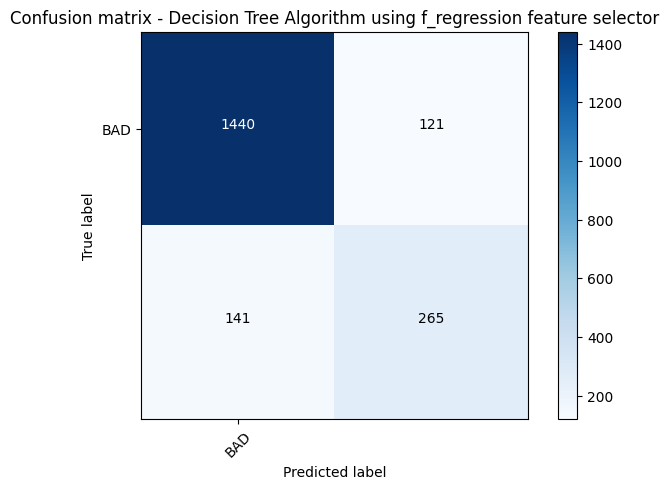

In [145]:

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a10 = accuracy_score(y_te,y_pre)
f10 = f1_score(y_te, y_pre, average="macro")
p10= precision_score(y_te, y_pre, average="macro")
r10 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a10)
print("f1 score : ",f10)
print("precision score : ",p10)
print("recall score : ",r10)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
                      title='Confusion matrix - Decision Tree Algorithm using f_regression feature selector')

plt.show()

In [146]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree'],
    'Feature Selection Method' : ['None','None','Pearson corr_fact','Pearson corr_fact','chi2 test','chi2 test','f_classif','f_classif','f_regression','f_regression'],
    'Accuracy Score': [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10],
    'Recall Score' : [r1,r2,r3,r4,r5,r6,r7,r8,r9,r10],
    'F1 Score' : [f1,f2,f3,f4,f5,f6,f7,f8,f9,f10],
    'Precision Score' : [p1,p2,p3,p4,p5,p6,p7,p8,p9,p10]
})


In [147]:
models

,Model,Feature Selection Method,Accuracy Score,Recall Score,F1 Score,Precision Score
0,Logistic Regression,None,0.793594,0.500000,0.442460,0.396797
1,Decision Tree,None,0.864769,0.774470,0.785237,0.798119
2,Logistic Regression,Pearson corr_fact,0.824098,0.617630,0.640866,0.763879
3,Decision Tree,Pearson corr_fact,0.854601,0.768975,0.773932,0.779333
4,Logistic Regression,chi2 test,0.793594,0.500000,0.442460,0.396797
5,Decision Tree,chi2 test,0.865277,0.786637,0.791122,0.795940
6,Logistic Regression,f_classif,0.825623,0.624970,0.649672,0.763478
7,Decision Tree,f_classif,0.860702,0.779198,0.783825,0.788820
8,Logistic Regression,f_regression,0.825623,0.624970,0.649672,0.763478
9,Decision Tree,f_regression,0.866802,0.787597,0.792903,0.798672


In [148]:
pd.pivot_table(models,index = ["Feature Selection Method","Model"])

Accuracy Score  F1 Score  \
Feature Selection Method Model                                           
None                     Decision Tree              0.864769  0.785237   
                         Logistic Regression        0.793594  0.442460   
Pearson corr_fact        Decision Tree              0.854601  0.773932   
                         Logistic Regression        0.824098  0.640866   
chi2 test                Decision Tree              0.865277  0.791122   
                         Logistic Regression        0.793594  0.442460   
f_classif                Decision Tree              0.860702  0.783825   
                         Logistic Regression        0.825623  0.649672   
f_regression             Decision Tree              0.866802  0.792903   
                         Logistic Regression        0.825623  0.649672   

                                              Precision Score  Recall Score  
Feature Selection Method Model                                               
None                     Decision Tree               0.798119      0.774470  
                         Logistic Regression         0.396797      0.500000  
Pearson corr_fact        Decision Tree               0.779333      0.768975  
                         Logistic Regression         0.763879      0.617630  
chi2 test                Decision Tree               0.795940      0.786637  
                         Logistic Regression         0.396797      0.500000  
f_classif                Decision Tree               0.788820      0.779198  
                         Logistic Regression         0.763478      0.624970  
f_regression             Decision Tree               0.798672      0.787597  
                         Logistic Regression         0.763478      0.624970

Recall metric in the testing dataset:  0.9088669950738916
Accuracy score for the testing dataset:  0.5043213014743264
Confusion matrix, without normalization
[[623 938]
 [ 37 369]]

Recall metric in the testing dataset:  0.6674876847290641
Accuracy score for the testing dataset:  0.7391967463141841
Confusion matrix, without normalization
[[1183  378]
 [ 135  271]]

Recall metric in the testing dataset:  0.5
Accuracy score for the testing dataset:  0.8093543467208948
Confusion matrix, without normalization
[[1389  172]
 [ 203  203]]

Recall metric in the testing dataset:  0.3669950738916256
Accuracy score for the testing dataset:  0.8235892221657346
Confusion matrix, without normalization
[[1471   90]
 [ 257  149]]

Recall metric in the testing dataset:  0.2832512315270936
Accuracy score for the testing dataset:  0.8256227758007118
Confusion matrix, without normalization
[[1509   52]
 [ 291  115]]

Recall metric in the testing dataset:  0.22167487684729065
Accuracy score for the testing

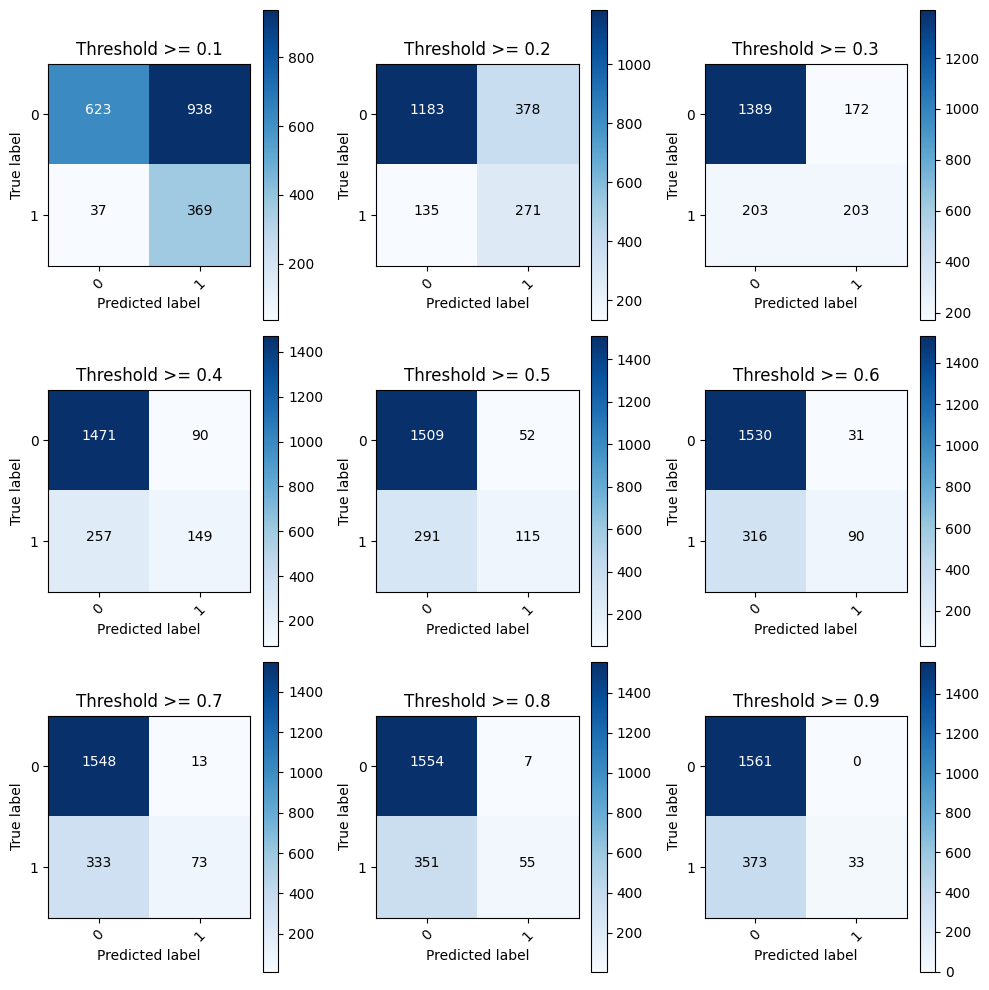

In [149]:
lr = LogisticRegression()
lr.fit(x_tr,y_tr)
y_pred_proba = lr.predict_proba(x_te)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba[:,1] >= i

    plt.subplot(3,3,j)
    j += 1

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_te,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    rec1 = recall_score(y_te, y_test_predictions_high_recall)
    acc= 1.0*(cnf_matrix[0,0]+cnf_matrix[1,1])/(cnf_matrix[0,0]+cnf_matrix[1,0]+cnf_matrix[1,1]+cnf_matrix[0,1])
    print("Recall metric in the testing dataset: ",rec1)
    print("Accuracy score for the testing dataset: ",acc)
    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i)
    print("")

In [152]:
# getting length and indices of minority class.
default_len = len(data[data["BAD"]==1])
default_indices = np.array(data[data["BAD"]==1].index)

# selecting the same number of elements from majority class randomly.
good_indices = np.array(data[data["BAD"]==0].index)
rand_good_indices = np.random.choice(good_indices, default_len, replace = False)
rand_good_indices = np.array(rand_good_indices)

# combing the indices
combined_indices = np.concatenate([rand_good_indices,default_indices])

# getting the corresponding dataset with above indices.
comb_df = data.iloc[combined_indices,:]
comb_y = comb_df["BAD"]

In [153]:
from sklearn.feature_selection import f_classif

comb_x = pd.DataFrame(SelectKBest(f_classif, k=10).fit_transform(comb_df.drop(["BAD"],axis=1),comb_df["BAD"]))
comb_x.head()

,0,1,2,3,4,5,6,7,8,9
0,53800.0,2.302585,0.0,0.0,171.447555,0.000000,24.709060,0.0,0.0,0.0
1,8400.0,2.397895,0.0,0.0,190.017503,1.186055,25.768965,0.0,0.0,1.0
2,10700.0,1.098612,0.0,0.0,223.200000,0.000000,33.779915,0.0,0.0,0.0
3,8500.0,2.944439,0.0,0.0,202.954277,1.000000,34.828648,0.0,0.0,0.0
4,21500.0,2.294782,0.0,0.0,247.813971,0.000000,39.148512,0.0,0.0,1.0


In [154]:
# spliting the data into train and test datasets

x_trc,x_tec,y_trc,y_tec = train_test_split(comb_x,comb_y,test_size =.33,random_state=1000)

0.645
0.6712962962962963
0.6307692307692307
0.6910994764397905

Accuracy Score =  0.732484076433121
F1 Score =  0.7316789718348373
Precision Score =  0.733950212905339
Recall Score =  0.7318602054198642



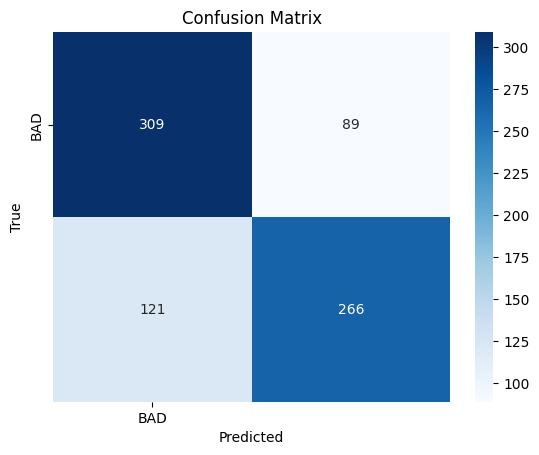

In [171]:
# using Kfold scores to train the data since very less data is available
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt


lr = LogisticRegression()
lr = LogisticRegression(max_iter=1000)  # You can adjust the number of iterations as needed


def printing_Kfold_scores(x_trc,y_trc):
    fold = KFold(n_splits=4, shuffle=False)
    for train, test in fold.split(x_trc, y_trc):

        x1 = x_trc.iloc[train,:]
        y1 = y_trc.iloc[train]
        x2 = x_trc.iloc[test,:]
        y2 = y_trc.iloc[test]
        lr.fit(x1,y1)
        y_pred_undersample = lr.predict(x2)
        recall_acc = recall_score(y2,y_pred_undersample)
        print(recall_acc)

printing_Kfold_scores(x_trc,y_trc)

y_predr = lr.predict(x_tec)

print("")
print('Accuracy Score = ',accuracy_score(y_tec,y_predr))
print('F1 Score = ',f1_score(y_tec, y_predr, average="macro"))
print('Precision Score = ',precision_score(y_tec, y_predr, average="macro"))
print('Recall Score = ',recall_score(y_tec, y_predr, average="macro"))
print("")
cnf_matrix = confusion_matrix(y_tec, y_predr)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Use it like this:
plot_confusion_matrix(y_tec, y_predr, labels=["BAD"])



plt.show()

Decision Tree Algorithm
0.765
0.7407407407407407
0.8205128205128205
0.806282722513089

Accuracy Score =  0.7923566878980892
F1 Score =  0.7923512963945674
Precision Score =  0.7923877341711347
Recall Score =  0.7924408866035604



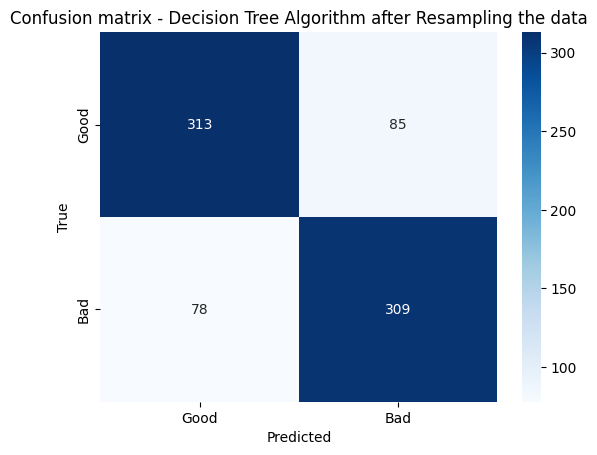

In [180]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

lr = DecisionTreeClassifier()

def printing_Kfold_scores(x_trc, y_trc):
    print("Decision Tree Algorithm")
    fold = KFold(n_splits=4, shuffle=False)
    for train, test in fold.split(x_trc):  # Use split method instead of direct iteration
        x1 = x_trc.iloc[train, :]
        y1 = y_trc.iloc[train]
        x2 = x_trc.iloc[test, :]
        y2 = y_trc.iloc[test]
        lr.fit(x1, y1)
        y_pred_undersample = lr.predict(x2)
        recall_acc = recall_score(y2, y_pred_undersample)
        print(recall_acc)

printing_Kfold_scores(x_trc, y_trc)

y_predr = lr.predict(x_tec)
print("")
print('Accuracy Score = ', accuracy_score(y_tec, y_predr))
print('F1 Score = ', f1_score(y_tec, y_predr, average="macro"))
print('Precision Score = ', precision_score(y_tec, y_predr, average="macro"))
print('Recall Score = ', recall_score(y_tec, y_predr, average="macro"))
print("")

cnf_matrix = confusion_matrix(y_tec, y_predr)

# Plot non-normalized confusion matrix
plt.figure()
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Good", "Bad"], yticklabels=["Good", "Bad"])
plt.title('Confusion matrix - Decision Tree Algorithm after Resampling the data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


